# SGD Regression Class from SkLearn  comparsion with Manual SGD Code

In [101]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)
boston.data[1]

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [3]:
boston_data = pd.DataFrame(boston.data)
boston_data['PRICE'] = boston.target
boston_data.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [4]:
X = boston_data.drop('PRICE', axis = 1)
Y = boston_data['PRICE']

In [5]:
X.shape , Y.shape


((506, 13), (506,))

### train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(339, 13) (339,)
(167, 13) (167,)


###  StandardScaler

In [7]:
# applying column standardization on train and test data
from sklearn.preprocessing import StandardScaler

standard_scalar=StandardScaler()
X_train=standard_scalar.fit_transform(np.array(X_train))
X_test=standard_scalar.transform(np.array(X_test))

## Linear Regressor

(167,)
(167,)
Mean Squared Error  28.530458765974625
0.6956551656111603


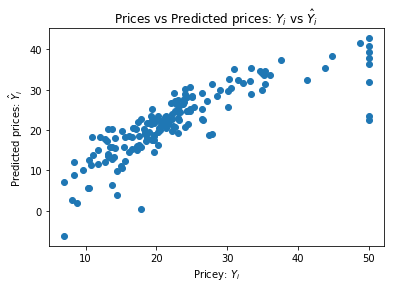

In [9]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred.shape)
print(y_test.shape)
print("Mean Squared Error ",mean_squared_error(y_test, y_pred))
#print("Root Maen Mean Squared Error ",np.sqrt((((y_test1 - y_pred)**2).sum(axis=0))/y_pred.shape[0]))
print(clf.score(X_test, y_test))

#Plot (Y_test vs Y_test_pred) sklearn's LinearRegression
plt.scatter(y_test, y_pred)
plt.xlabel("Pricey: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# SGDRegressor

(167,)
(167,)
Mean Squared Error  29.977240676507524
Root Mean Square Error :  5.475147548377808
1.0
[-0.75095812  0.48450061 -0.36451725  0.32301409 -0.45576306  3.17623322
 -0.25421863 -1.87761304  0.70585468 -0.42636527 -1.8592365   0.81296171
 -2.92759086]
[21.90419638]


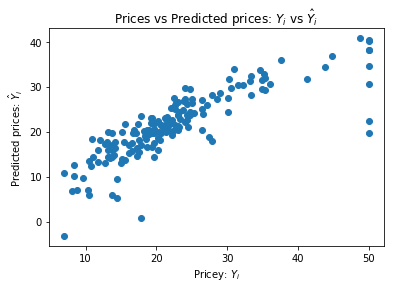

In [102]:
clf = SGDRegressor()
clf.fit(X_train, y_train)
y_pred_sgd=clf.predict(X_test)
y_test_sgd=y_test 
print(y_pred_sgd.shape)
print(y_test_sgd.shape)
sgd_error=np.sqrt(mean_squared_error(y_test_sgd, y_pred_sgd))

print("Mean Squared Error ",mean_squared_error(y_test_sgd, y_pred_sgd))
print("Root Mean Square Error : ",sgd_error)

print(clf.score(X_test, y_pred_sgd))


print(clf.coef_)
print(clf.intercept_)


#Plot (Y_test vs Y_test_pred) sklearn's SGDRegression
plt.scatter(y_test_sgd, y_pred_sgd)
plt.xlabel("Pricey: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# Manual SGD CODE

### Data Preparation

In [103]:
xi=X_train
yi=y_train

print("xi shape :",xi.shape)
print("yi shape :",yi.shape)

xi shape : (339, 13)
yi shape : (339,)


In [104]:
type(yi)
yi=np.asarray(yi)
yi = np.reshape(yi, (1, 339))
yi.shape

(1, 339)

In [18]:
#Testing Code

#m_deriv1 =np.dot((yi - (np.dot(xi , w1)+b1).T ), (-2*np.asmatrix(xi)))
#(np.dot( w1.T ,xi[0].T) + b1)
#for i in range(xi.shape[0]):
#    a=(np.dot( w1.T ,xi[i].T) + b1)
#    a1=yi[0,i]
#            
#    b_deriv1+=-2*(a1-a)

### Actual Code

In [75]:
r= 1
m_deriv = 0
b_deriv = 0
learning_rate =0.000001
it = 1
w0=0
b0=0
w0_grad=0
b0_grad=0
w0_random = np.random.rand(13)
w_old = np.asmatrix(w0_random).T
b = np.random.rand()
b_old = np.random.rand() 
b_deriv1=0

print("w_old Shape : ",w_old)
print("b_old Shape : ",b_old)

print("xi shape :",xi.shape)
print("yi shape :",yi.shape)



for j in range(5000):
    for i in range(1):
        w1=w_old
        b1=b_old
        m_deriv1 =np.dot((yi - (np.dot(xi , w1)+b1).T ), (-2*np.asmatrix(xi)))
        
        for i in range(339):
            
            a=(np.dot( w1.T ,xi[i].T) + b1)
            a1=yi[0,i]
            
            b_deriv1+=-2*(a1-a)
    
    w_grad = m_deriv1 * learning_rate
    b_grad = b_deriv1 * learning_rate
        
    w_old=w_old.T

    w_new = w_old - w_grad
    b_new = b_old - b_grad

    it += 1
    if (w_new==w_old).all():
        break
    else:
        w_old = w_new.T
        b_old = b_new[0,0]
        learning_rate = learning_rate

print(w_new)
print(b_new)

w_old Shape :  [[0.63906861]
 [0.35701883]
 [0.87577566]
 [0.518013  ]
 [0.8189095 ]
 [0.36494043]
 [0.44796275]
 [0.07442719]
 [0.29094469]
 [0.19033339]
 [0.6029744 ]
 [0.76964201]
 [0.37612381]]
b_old Shape :  0.08841501617743008
xi shape : (339, 13)
yi shape : (1, 339)
[[-0.88687494  0.54549832 -0.31781386  0.29406197 -0.27477317  3.33599136
  -0.3457336  -1.49742506  0.58232525 -0.66532107 -1.79609324  0.97851434
  -2.98031435]]
[[26.27415341]]


In [106]:
yi_test1 = np.asmatrix(y_test).T
y_pred1 =np.dot(X_test ,( w_new.T )) + b_new

yi_test1=np.asarray(yi_test1)
y_pred1=np.asarray(y_pred1)

print(' Mean Square error of ownSGD =',mean_squared_error(yi_test1,y_pred1))
Root_Mean_Square_error_ownSGD=np.sqrt(mean_squared_error(yi_test1,y_pred1))
print('Root Mean Square error of ownSGD =',Root_Mean_Square_error_ownSGD)


 Mean Square error of ownSGD = 40.78313343944556
Root Mean Square error of ownSGD = 6.386167351349756


### Using DataFrame Comaparsion y_pred1 and yi_test1

In [107]:
predicted=pd.DataFrame(y_pred1)
actual=pd.DataFrame(yi_test1)
df=pd.concat([actual,predicted],axis=1)

df.head(5)


,0,0
0,37.6,40.601757
1,27.9,33.417782
2,22.6,30.449701
3,13.8,8.920778
4,35.2,37.870757


## Plot Between y_actual and y_predict

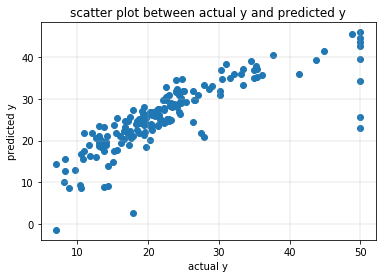

In [108]:
plt.scatter(yi_test1,y_pred1)
plt.grid(b=True, linewidth=0.3)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show()

## Plot bewtween  y_pred_sgd(SGD Regressor)  and y_pred(your own SGD CODE)

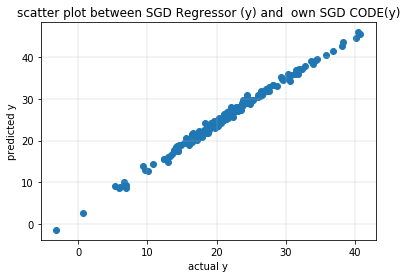

**************************************************************


In [111]:

plt.scatter(y_pred_sgd , y_pred1)
plt.grid(b=True, linewidth=0.3)
plt.title('scatter plot between SGD Regressor (y) and  own SGD CODE(y)')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show()
print('**************************************************************')

## Comparsion between weights of SGD Regressor and Manual SGD Code

In [82]:
print(clf.coef_)
print(clf.intercept_)# sgd_error
print(w_new)
print(b_new)

[-0.89854896  0.46155762 -0.63948464  0.29027772 -0.45968502  3.23097525
 -0.36150488 -1.77019036  0.71263024 -0.52329898 -1.86767509  0.89155273
 -2.95770292]
[21.88791544]
[[-0.88687494  0.54549832 -0.31781386  0.29406197 -0.27477317  3.33599136
  -0.3457336  -1.49742506  0.58232525 -0.66532107 -1.79609324  0.97851434
  -2.98031435]]
[[26.27415341]]


In [91]:
sgdRegessor=clf.coef_.tolist()
yourSGD=np.array(w_new).flatten().tolist()

### pretty table for weights of SGD REGRESSOR and Manula SGD Code

In [99]:
from prettytable import PrettyTable
x = PrettyTable()

feature_names = boston.feature_names
x.field_names = feature_names

x.add_row(sgdRegessor)
x.add_row(yourSGD)

print(x)

+---------------------+--------------------+---------------------+---------------------+---------------------+--------------------+---------------------+---------------------+--------------------+---------------------+---------------------+--------------------+--------------------+
|         CRIM        |         ZN         |        INDUS        |         CHAS        |         NOX         |         RM         |         AGE         |         DIS         |        RAD         |         TAX         |       PTRATIO       |         B          |       LSTAT        |
+---------------------+--------------------+---------------------+---------------------+---------------------+--------------------+---------------------+---------------------+--------------------+---------------------+---------------------+--------------------+--------------------+
| -0.8985489561733727 | 0.4615576154354494 | -0.6394846425626869 | 0.29027772061125645 | -0.4596850226141225 | 3.2309752524034714 | -0.3615048825195459

#Analysis :
#lr_rate - iter == eeror
#0.000001 - 5000 == 6.4, 100 == 20 , 1000 = 15.089
#0.0001 - 1000 = 19.35 , 100 == 11 ,70 == 20 ,500 = 9.3,250=18,600 = 22


## Comparsion of RMSE and MSE  for Sklearn_SGD and Manual_SGD

In [117]:
MSE_SGD=mean_squared_error(y_test_sgd, y_pred_sgd)
RMSE_SGD=sgd_error

MSE_ManualSGD=mean_squared_error(yi_test1,y_pred1)
RMSE_ManualSGD=Root_Mean_Square_error_ownSGD


from prettytable import PrettyTable
y = PrettyTable()

y.field_names = ['Algo','RootMeanSquareError','MeanSquareError']

y.add_row(['SKlearn_SGD',MSE_SGD,RMSE_SGD])
y.add_row(['Manual_SGD', MSE_ManualSGD , RMSE_ManualSGD ])

print(y)

+-------------+---------------------+-------------------+
|     Algo    | RootMeanSquareError |  MeanSquareError  |
+-------------+---------------------+-------------------+
| SKlearn_SGD |  29.977240676507524 | 5.475147548377808 |
|  Manual_SGD |  40.78313343944556  | 6.386167351349756 |
+-------------+---------------------+-------------------+
